In [2]:
import pandas as pd
df = pd.read_excel('heartRisk.xlsx')
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


In [3]:
df1 = pd.DataFrame(df, columns = ['Systolic', 'Cholesterol'])
print(df1.head())

   Systolic  Cholesterol
0       101          181
1       167          155
2       181          147
3       145          166
4       134          199


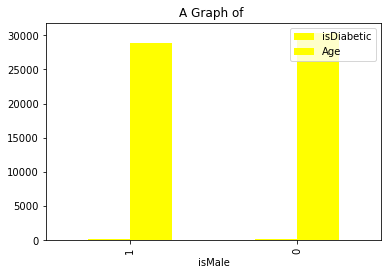

In [4]:
df2 = df[['isMale','isDiabetic','Age']]
df2_group = df2.groupby('isMale')
summation = df2_group.sum()

data = pd.DataFrame(data = summation)
result = data.sort_values(by=['Age'], ascending = True)
myplot = result.plot(kind = 'bar', rot = 90, color = "yellow", title = "A Graph of ", legend = 'lower left')


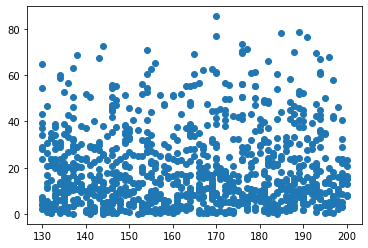

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

risk_x = df[['Cholesterol']]
risk_y = df[['Risk']]
plt.scatter(risk_x, risk_y)

     Cholesterol
132          191
924          168
464          186
811          136
618          149
..           ...
494          156
672          190
477          135
571          169
371          149

[800 rows x 1 columns]


     Risk
132  27.7
924   0.6
464   7.9
811  13.3
618  10.0
..    ...
494  10.5
672  40.2
477   2.6
571  14.0
371   8.5

[800 rows x 1 columns]


     Cholesterol
271          139
232          169
978          142
625          188
582          132
..           ...
267          169
338          193
483          134
124          149
165          170

[200 rows x 1 columns]


The predicted Y value for Cholesterol = 60 is:  [[14.87971376]]
Coefficients: 
 [[0.04225267]]


Mean squared error:  315.55686862591074
Coefficient of determination:  -0.00892051403271199


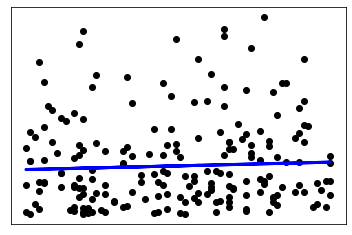

In [6]:
X_train,X_test,y_train,y_test=train_test_split(risk_x, risk_y,test_size=0.2)
print(X_train)
print("\n")
print(y_train)
print("\n")
print(X_test)
 
regr = LinearRegression()
 

regr.fit(X_train, y_train)
 

y_pred = regr.predict(X_test)
y_pred2 = regr.predict([[60]])
print("\n")
print("The predicted Y value for Cholesterol = 60 is: ", y_pred2)
 

print('Coefficients: \n', regr.coef_)
print("\n")
 
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))
 
 # Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
 
plt.xticks(())
plt.yticks(())
 
plt.show()



In [7]:
import statsmodels.api as sm

risk1_x = df[['isMale', 'isBlack' , 'isSmoker', 'isDiabetic', 'isHypertensive', 'Age', 'Systolic', 'Cholesterol','HDL']]
risk1_y = df[['Risk']]
 
#Split the dataset into training and testing sets (80%:20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(risk1_x, risk1_y, test_size=0.2)
print(X_train1)
print("\n")
print(y_train1)
print("\n")
print(X_test1)
 
#Create linear regression object
regr = LinearRegression()
 
# Train the model using the training sets 
regr.fit(X_train1, y_train1)
 
# Make predictions using the testing set
y_pred1 = regr.predict(X_test1)
 
#Make prediction for the following:
pisMale = 1
pisBlack = 0
pisSmoker = 0
pisDiabetic = 1
pisHypertensive = 1
pAge = 65
pSystolic = 145
pCholesterol = 182
pHDL = 43
print("\n")
print ('Predicted Y value: ', regr.predict([[pisMale, pisBlack, pisSmoker, pisDiabetic, pisHypertensive, pAge, pSystolic, 
                                             pCholesterol, pHDL]]))
print("\n")
 
# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")
 
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test1, y_pred1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test1, y_pred1))
 
 
#Use statsmodel for model summary
risk1_x = sm.add_constant(risk1_x)
model = sm.OLS(risk1_y, risk1_x).fit()
predictions = model.predict(risk1_x)
print_model = model.summary()
print(print_model)


     isMale  isBlack  isSmoker  isDiabetic  isHypertensive  Age  Systolic  \
818       1        0         1           0               0   76        96   
242       0        1         1           0               1   61       138   
524       1        0         0           1               0   47        92   
106       1        0         0           0               1   51       189   
504       0        0         0           1               0   41        90   
..      ...      ...       ...         ...             ...  ...       ...   
831       0        0         0           1               1   54        90   
679       1        0         1           1               0   43       169   
381       1        1         0           0               1   75       149   
741       0        0         1           1               0   43        90   
817       0        1         1           1               1   44       146   

     Cholesterol  HDL  
818          177   75  
242          136   33  
524